<a href="https://colab.research.google.com/github/yash1thsa/machine_learning_pipelines/blob/main/Food_hub_analysis_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [32]:
# Installing the libraries with the specified version.
!pip install pandas numpy seaborn matplotlib

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [33]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [34]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Read the food hub orders dataset
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [36]:
# Read the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [37]:
# Fetch the rows and columns in the data
df.shape

(1898, 9)

#### Observations:

The data has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [38]:
# List all the columns with thier datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The columns order_id, customer_id, food_prepartation_time, delivery_time are  integers, columns restaurant_name, cuisine_type, day_of_the_week, rating are strings while cost_of_the_order columns is float


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [39]:
# Find null values in every column of the dataset
print(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
Based on the info and isnull check commands, we can confirm that there are no missing values in all the columns .Out of 1898 records, non of them is null for any column.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [40]:
# Get all the statistics of numerical columns in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The min, avg and max time it takes for food preparation is 20 min, 27.37 min and 35 min respectively


### **Question 5:** How many orders are not rated? [1 mark]

In [41]:
# Group the data by rating column and count the associated orders
unrated_order_count = df[df['rating'] == "Not given"]['order_id'].count()
print(f"Number of orders not rated: {unrated_order_count}")

Number of orders not rated: 736


#### Observations:  
Out of 1898 orders, 736 have no ratings. These orders are classified as 'Not given' as shown in the query result.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [42]:
#unique orders
df['order_id'].nunique()

1898

In [13]:
#unique customers
df['customer_id'].nunique()

1200

In [14]:
#unique restaurants
df['restaurant_name'].nunique()

178

In [15]:
#unique cuisines
df['cuisine_type'].nunique()

14

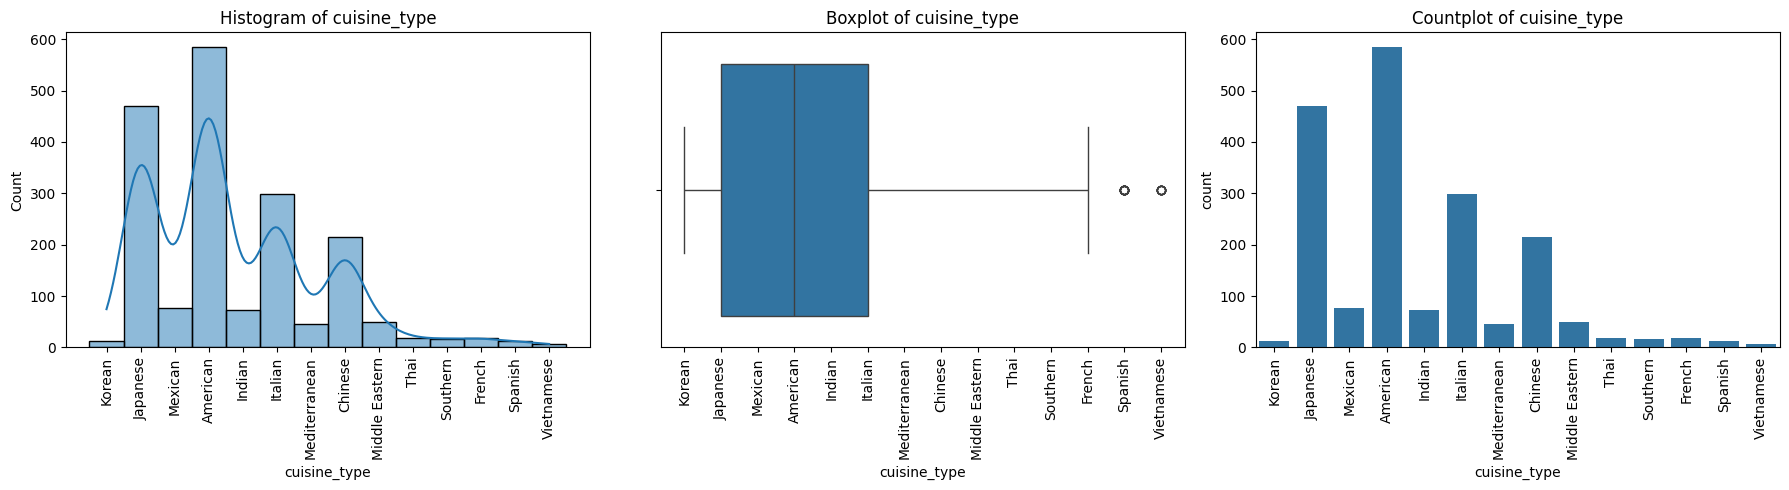

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64




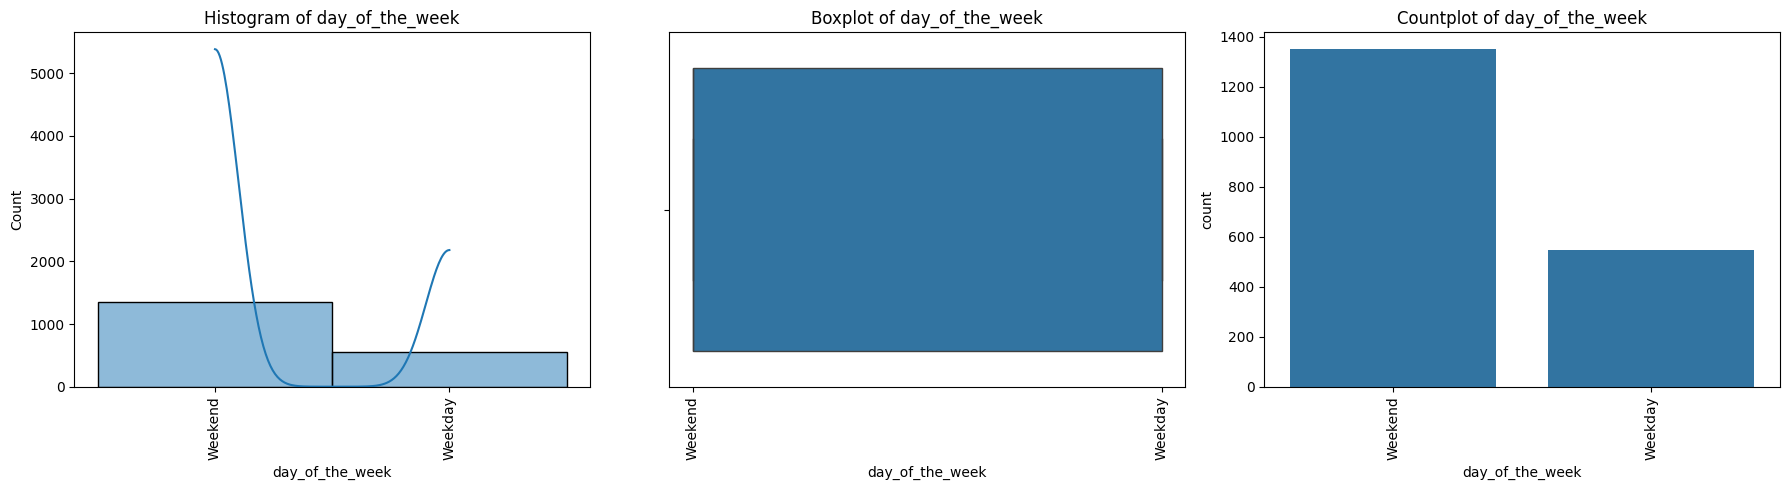

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64




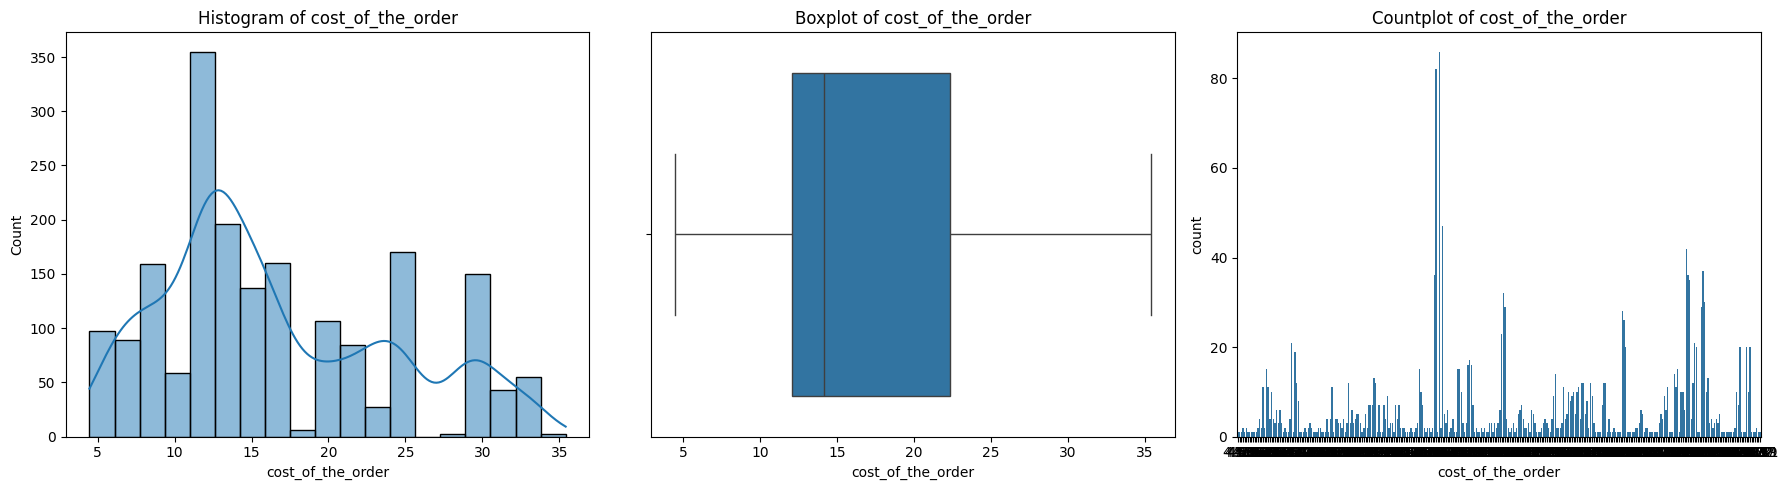

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64




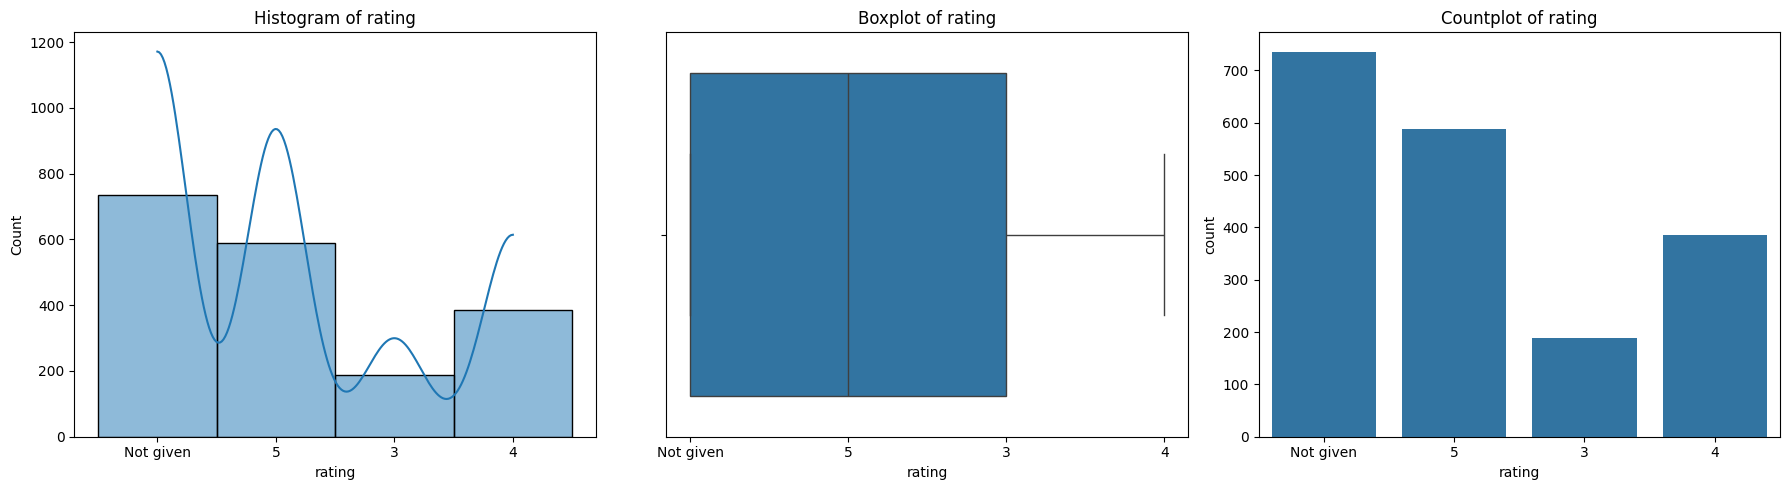

count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object




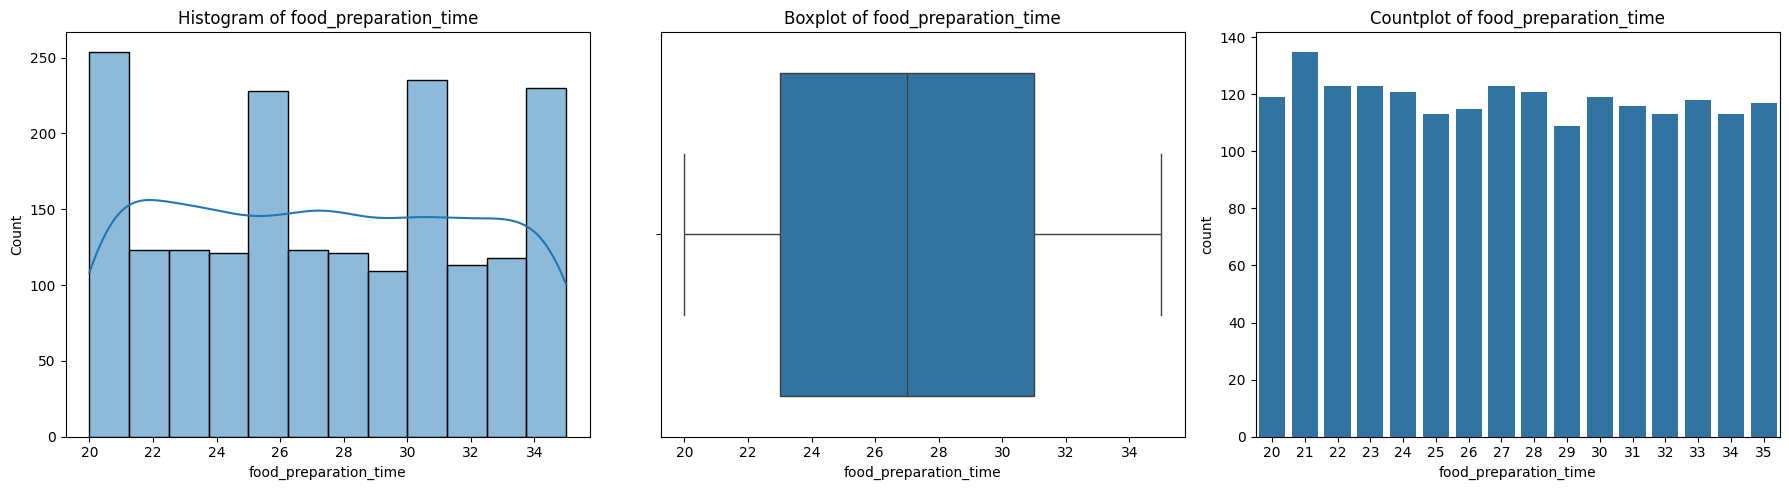

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64




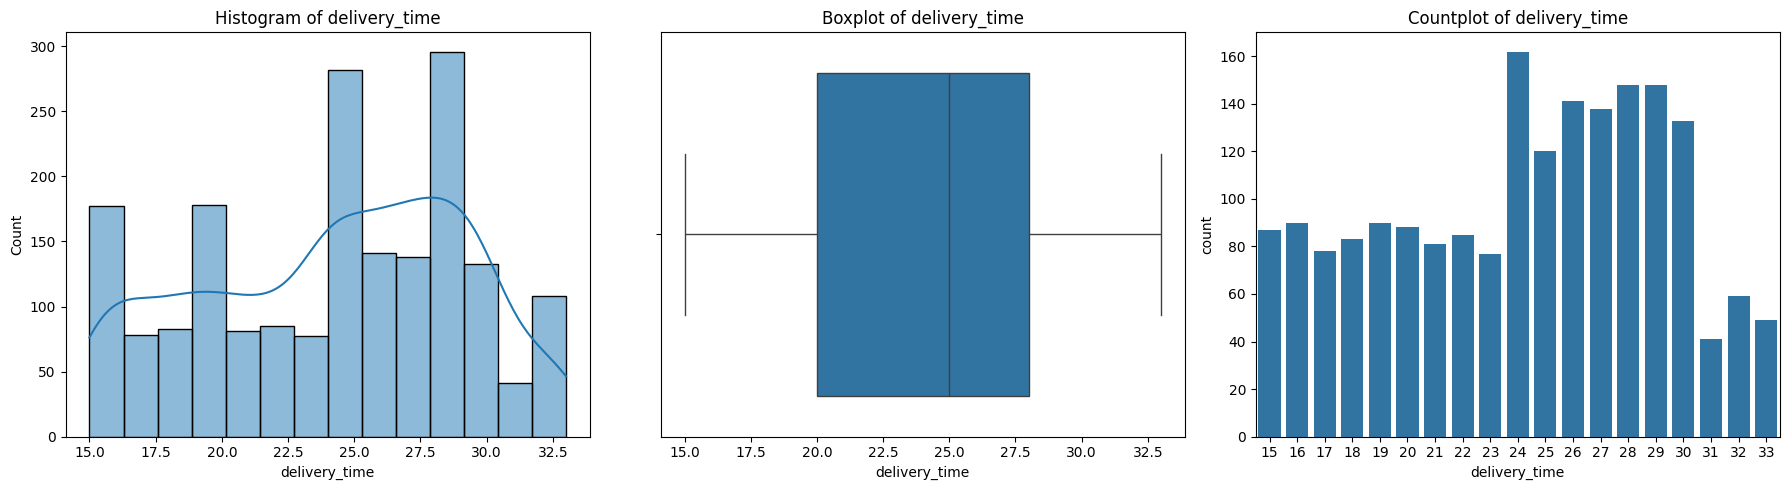

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64




In [43]:
#categorical columns
#Ignore order_id and customer_id as they donot quantify any metrics
categorical_cols = ['cuisine_type', 'day_of_the_week']

# Numerical columns
numerical_cols = ['cost_of_the_order', 'rating', 'food_preparation_time', \
                  'delivery_time']


# Univariate analysis for categorical features
for col in categorical_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.histplot(data=df, x=col, ax=axes[0], kde=True)
    axes[0].set_title(f'Histogram of {col}')
    axes[0].tick_params(axis='x', rotation=90)

    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].tick_params(axis='x', rotation=90)

    sns.countplot(data=df, x=col, ax=axes[2])
    axes[2].set_title(f'Countplot of {col}')
    axes[2].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

    print(df[col].value_counts())
    print("\n")


# Univariate analysis for numerical features
for col in numerical_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.histplot(data=df, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')

    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    sns.countplot(data=df, x=col, ax=axes[2])
    axes[2].set_title(f'Countplot of {col}')

    plt.tight_layout()
    plt.show()

    print(df[col].describe())
    print("\n")

#### **Observations**:

**Column Profile:**
1. The dataset has 1898 unique orders. Every record in the dataset has a unique order id
2. There are 1200 unique customers making a total of 1898 orders
3. There are 178 unique restaurants across 14 different cuisine types

**Categorical Columns:**
1. *Cuisine_type:* This has couple of outliers for spanish and vietnamese cuisines with low order count. Cusinies with low orders have scope to improve while high order cusinies can be optimized for performance
2. *Day_of_the_week*: High volume of orders are observed on weekends compared to weekdays. Personal allocation for deliveries/standby can be increased on weekends compared to weekdays.

**Numerical Columns:**
1. *Cost_of_order:* This feature is right skewed. The average order cost is 16 dollars which is higher than the mean 14. Recommendations can be increased for order value between 14 to 21 dollars
2.*Rating:* Most of the orders did not get a rating. This can be increased with special offers to customers participating in ratings.This will eventually help in recommending/promoting better restaurants to customers and prioritize workforce. Ratings are usually between 3-5
3. *food_preparation_time:* This feature is uniformly distributed with mean and average around 27 dollars. Mobility of delivery personals can be optimized based on food_preparation_time sliced by cuisine type and restaurant
4. *delivery_time:* This feature is left skewed. But one of the interesting aspect is most deliveries are between 24 to 30 minutes. Deliveries with more than 30 minutes are relatively less - outliers (refer count plot). There is a consistent good volume of orders in the 15 to 23 minute range. The outliers can be improved for performance.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [45]:
# Group the orders based on restaurant names and sort the transaction count in descending order
top5_restaurants = df.groupby('restaurant_name')['order_id'].nunique()\
.sort_values(ascending=False).head(5)

print(top5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### Observations:
Here are the top 5 restaurants along with the order count per restaurant.
Shake Shack	- 219, The Meatball Shop	- 132, Blue Ribbon Sushi	- 119, Blue Ribbon Fried Chicken	- 96, Parm - 68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [46]:
# Filter the orders based to fetch only weekend orders
# Group by cuisine_type and sort the order count in descending order
# Pick the top most record with highest order
popular_cuisine = df[df['day_of_the_week'] == "Weekend"]\
.groupby('cuisine_type')['order_id'].nunique()\
.sort_values(ascending=False).head(1).index[0]

print(f"The most popular cuisine on weekends is {popular_cuisine}")

The most popular cuisine on weekends is American


#### Observations:

Based on the orders served on weekends, American is the most popular cuisine


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [47]:
# Filter orders with cost greated than 20 and count unique orders - X
# Count unique orders in the whole dataset - Y
# Divide X by Y to get the percentage
order_pct = int(df[df['cost_of_the_order'] > 20]['order_id'].nunique())\
/int(df['order_id'].nunique()) * 100

print(f"The percentage of orders with cost more than 20 dollars is \
{round(order_pct, 2)}%")

The percentage of orders with cost more than 20 dollars is 29.24%


#### Observations:

Around 29.24% of transactions have order cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [48]:
# Pick the delivery time colmn and do a mean on it
print(f"The mean order delivery time: {df['delivery_time'].mean().item()}")

The mean order delivery time: 24.161749209694417


#### Observations:
The mean of order delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [49]:
# Group the orders per customer and do a count
# Sort the counts in descending order
# Pick the top 3 customer ids
customers = df.groupby('customer_id')['order_id'].nunique()\
.sort_values(ascending = False).head(3)

top_customers_list = list(zip(customers.index, customers.values))

top_customers_formatted = [(customer[0], customer[1].item()) \
                           for customer in top_customers_list]

print(f"The top 3 tuples of customer id and corresponding order \
counts are {top_customers_formatted}")

The top 3 tuples of customer id and corresponding order counts are [(52832, 13), (47440, 10), (83287, 9)]


#### Observations:

The customers 52832, 47440 and 83287 will qualify for the 20% discount vouchers . They have placed 13, 10 and 9 orders respectively

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


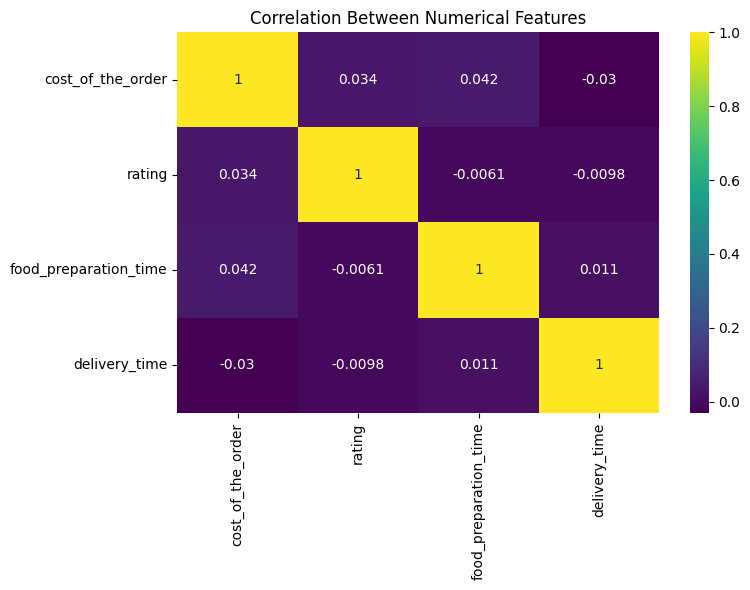

In [50]:
df['rating'] = pd.to_numeric(df['rating'].replace("Not given", pd.NA))

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['cost_of_the_order', 'rating',
                'food_preparation_time', 'delivery_time']].corr(),
            annot=True, cmap='viridis')
plt.title('Correlation Between Numerical Features')
plt.tight_layout()
plt.show()


#### Observations:
1. Food preparation time and delivery time show low correlation, suggesting these are relatively independent processes.

2. Rating has a small positive correlation with cost, hinting that higher-rated orders may be slightly more expensive.




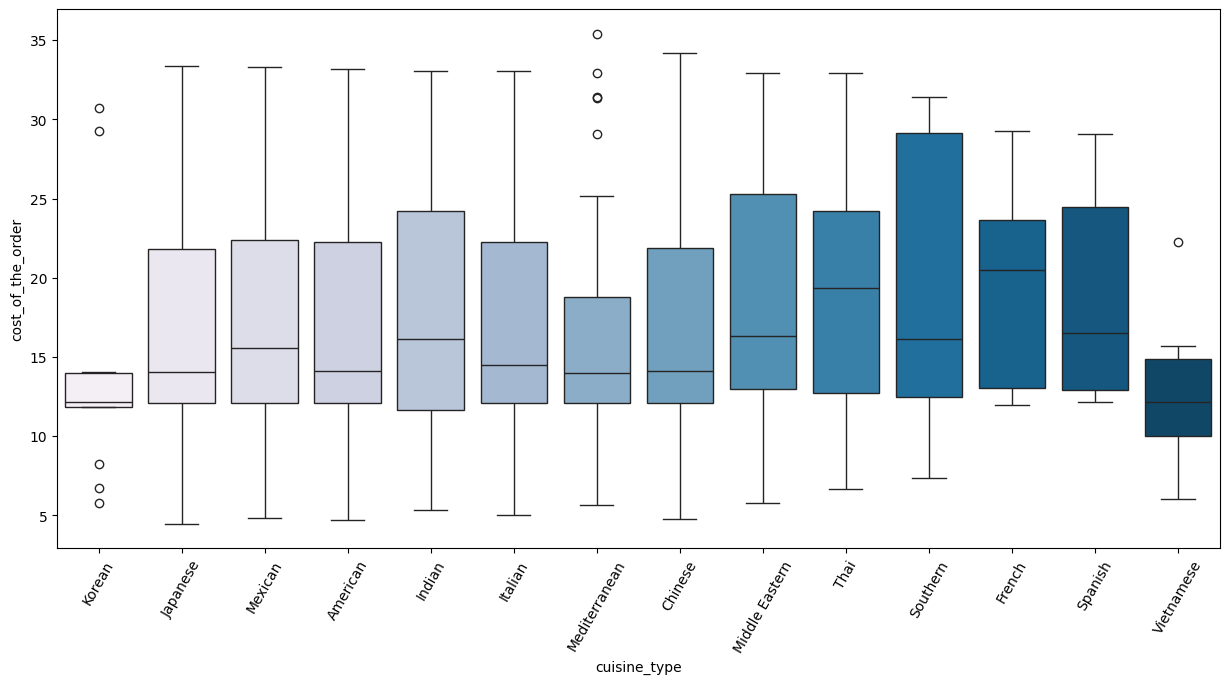

In [51]:
#cusine_type vs cost_of_the_order
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

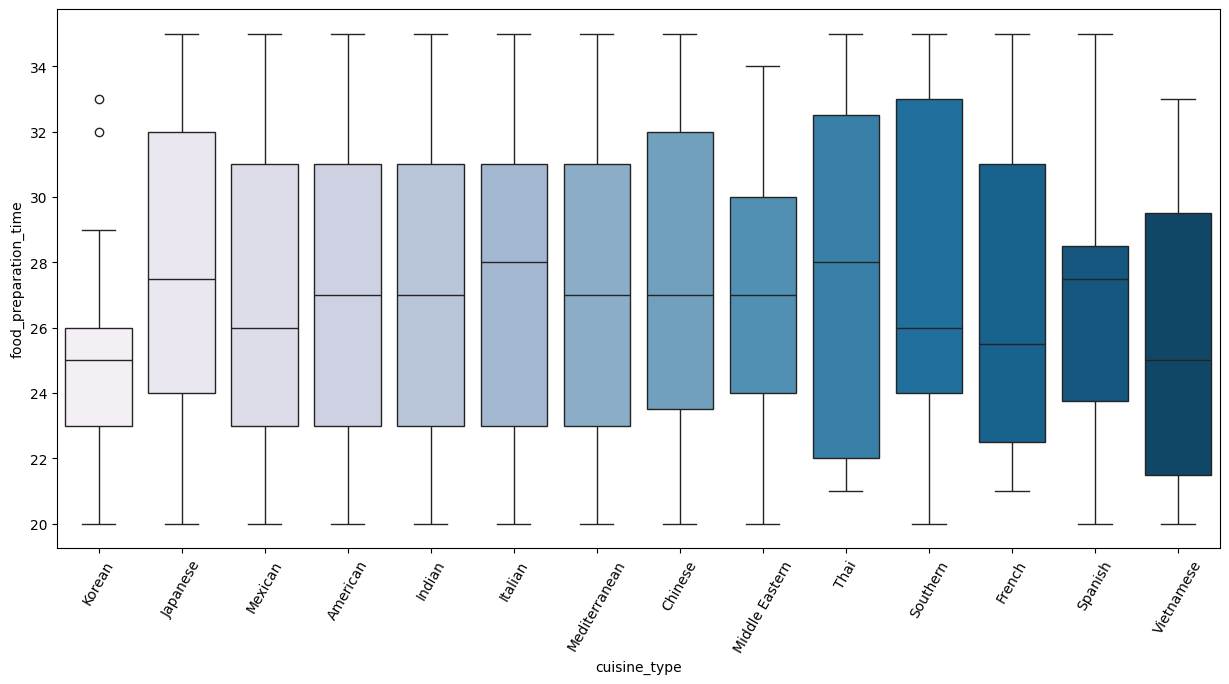

In [52]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

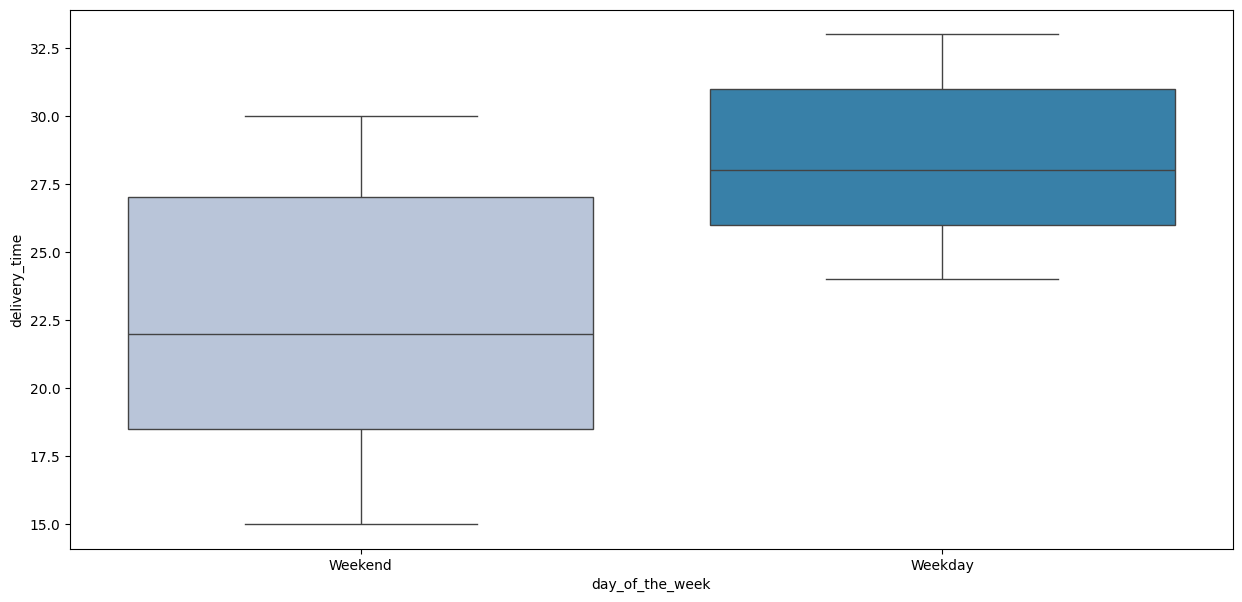

In [53]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu', hue = "day_of_the_week")
plt.show()

In [24]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


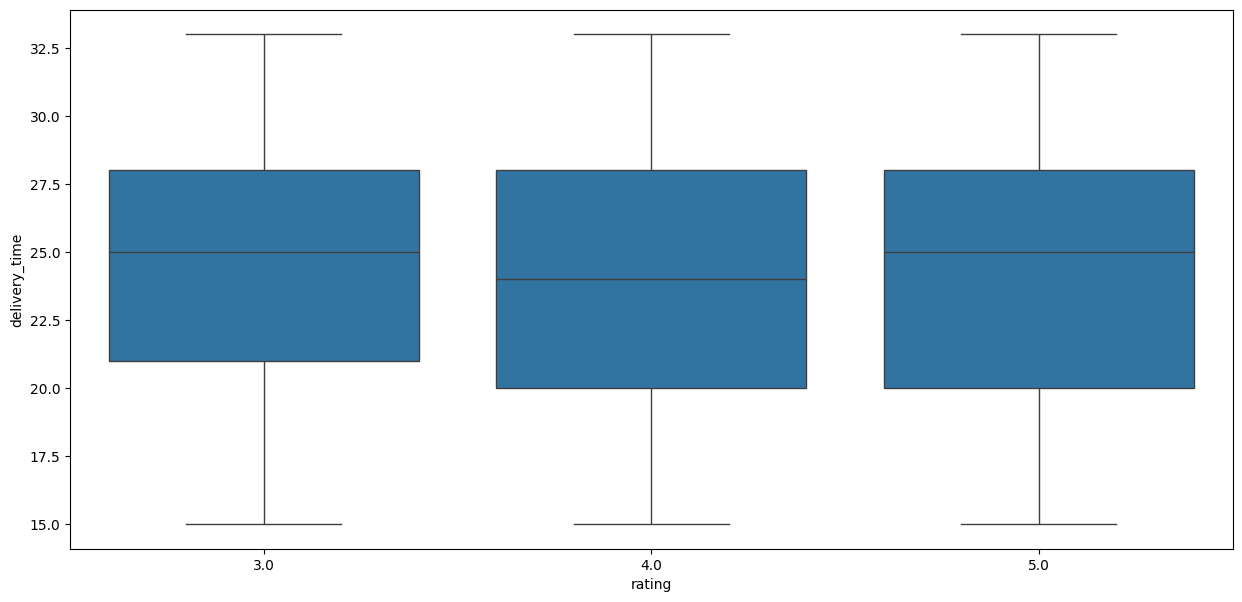

In [28]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

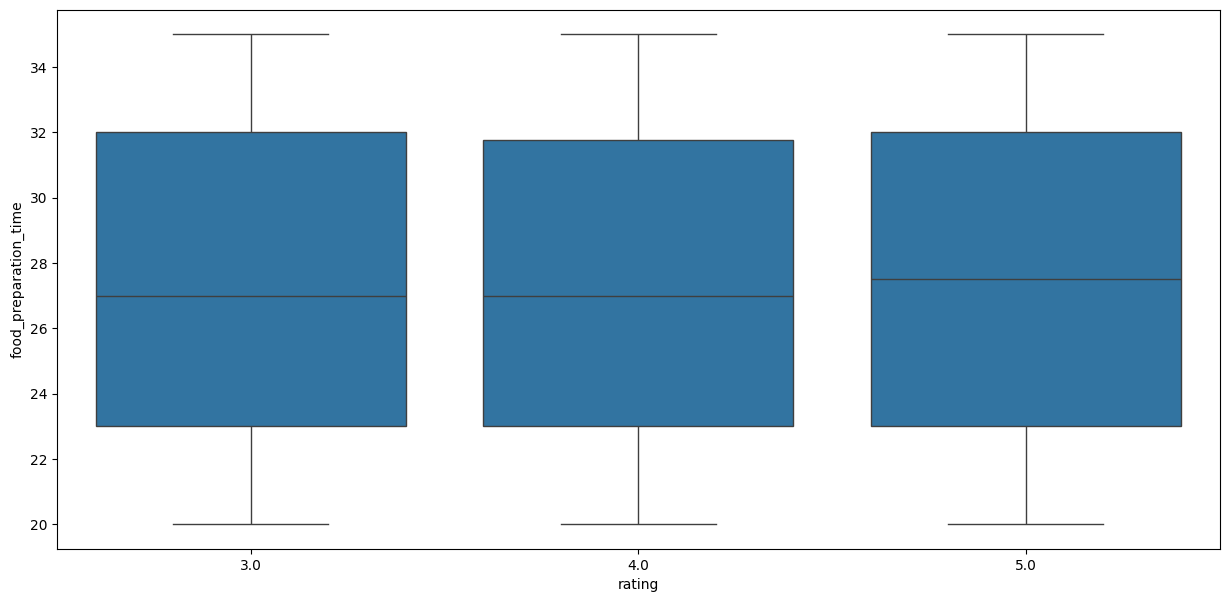

In [31]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

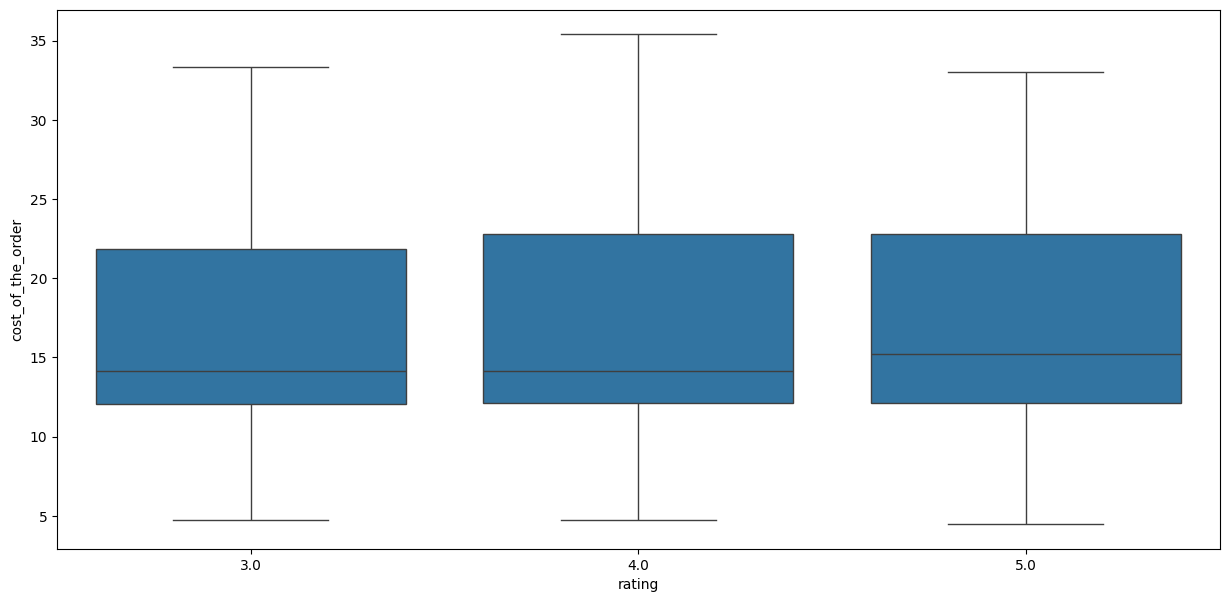

In [30]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [55]:
# Fix the "Not given" rating to nan to avoid conversion/filtering issues
# By giving nan, we are filtering out all unrated orders
df['rating'] = df['rating'].replace("Not given", np.nan)
df['rating'] = df['rating'].astype(float)

#Group the data by restaurant name
#Calculate mean and count which are needed to pick restaurants
restaurant_ratings = df.groupby('restaurant_name').agg(
    rating_count = ('rating', 'count'),
    average_rating = ('rating', 'mean')
).reset_index()

# Filter restaurants with rating > 50 and average rating > 4
eligible_restaurants = restaurant_ratings[
    (restaurant_ratings['rating_count'] > 50) \
    & (restaurant_ratings['average_rating'] > 4)
]['restaurant_name'].reset_index(drop=True).tolist()

# Show eligible restaurants
print(f" The eligible restaurants are {eligible_restaurants}")


 The eligible restaurants are ['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


#### Observations:

1. Inorder to successfully quantify the ratings, **we weed out the unrated orders**
2. 4 restaurants qualify for the promotional offer namely - **Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop**

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [54]:
#Function to calculate the revenue from cost column
#Logic:
###25% on the orders having cost greater than 20 dollars
###15% on the orders having cost greater than 5 dollars
###No revenue on orders lesser than or equal to 5 dollars
def calculate_revenue(cost):
  if cost > 20:
    cost = cost * 0.25
  elif cost > 5 and cost <= 20:
    cost = cost * 0.15
  return cost

#Lambda function to calculae revenue on every order
df['revenue'] = df['cost_of_the_order'].apply(lambda x: calculate_revenue(x))

#Aggregate the revenue across all orders
print(f"The net revenue generated by the company across all orders \
is {df['revenue'].sum()}")


The net revenue generated by the company across all orders is 6209.043


#### Observations:

Out of 31K worth of orders, the net revenue generated by the company is **6209.04 dollars** This is approximately around 20% of the orders.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [56]:
# Create a new column total_time = food_preparation_time + delivery_time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

#Total number of orders
total_orders = df['order_id'].nunique()

#Total number of orders with more than 60 minute for delivery
impacted_orders = df[df['total_time'] > 60]['order_id'].nunique()

print(f"{round(impacted_orders/total_orders * 100, 2)}% of orders take more \
than 60 minutes to get delivered")

10.54% of orders take more than 60 minutes to get delivered


#### Observations:

10.54% of orders take more than 60 minutes to get delivered


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [59]:
# Filter all weekday orders and calculate mean delivery time
weekday_delivery_time = \
df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Filter all weekend orders and calculate mean delivery time
weekend_delivery_time = \
df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Print weekday and weekend delivery time
print(f"weekday delivery time {round(weekday_delivery_time, 2)}")
print(f"weekend delivery time {round(weekend_delivery_time, 2)}")

print(f"The mean delivery time on weekdays \
({round(weekday_delivery_time, 2)} minutes) is higher than weekends \
 ({round(weekend_delivery_time, 2)} minutes) by 5.87 min")


weekday delivery time 28.34
weekend delivery time 22.47
The mean delivery time on weekdays (28.34 minutes) is higher than weekends  (22.47 minutes) by 5.87 min


#### Observations:

The mean delivery time on weekdays (28.34 minutes) is higher than weekends  (22.47 minutes) by 5.87 min

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---